# Q learner with fictitious play

In [1]:
import numpy as np

from engine import RMG
from agent import RandomAgent, IndQLearningAgent, FPLearningAgent

In [2]:
N_EXP = 10

r0ss = []
r1ss = []

In [3]:
for n in range(N_EXP):

    batch_size = 1
    max_steps = 20
    gamma = 0.96

    # Reward matrix for the Stag Hunt game
    ipd_rewards = np.array([[2., 1.], [0., 1.]])


    env = RMG(max_steps=max_steps, payouts=ipd_rewards, batch_size=batch_size)
    env.reset()

    possible_actions = [0, 1]  # Cooperate or Defect


    adversary, dm = FPLearningAgent(possible_actions, possible_actions, n_states=1, learning_rate=0.3, epsilon=0.05, gamma=gamma), \
        FPLearningAgent(possible_actions, possible_actions, n_states=1, learning_rate=0.3, epsilon=0.05, gamma=gamma)


    # Stateless interactions (agents do not have memory)
    s = 0

    n_iter = 1000

    r0s = []
    r1s = []

    for i in range(n_iter):

        # A full episode:
        done = False

        while not done:

            # Agents decide
            a0 = dm.act()
            a1 = adversary.act()

            # World changes
            _, (r0, r1), done, _ = env.step(([a0], [a1]))

            # Agents learn

            dm.update(s, (a0, a1), (r0, r1), s )
            adversary.update(s, (a1, a0), (r1, r0), s )

            #s = new_s  #stateless!

            #print(r0, r1)
            r0s.append(r0[0])
            r1s.append(r1[0])

        env.reset()
        
    print(n)
    r0ss.append(r0s)
    r1ss.append(r1s)

0
1
2
3
4
5
6
7
8
9


In [4]:
def moving_average(a, n=3) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

We report moving avearage of rewards, since it's common in RL taks

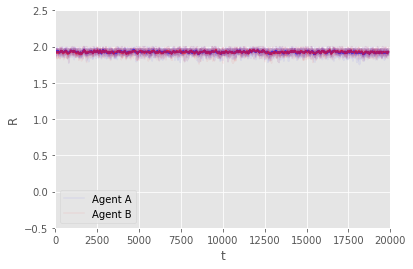

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

# We set a fancy theme
plt.style.use('ggplot')

plt.axis([0, max_steps*n_iter, -0.5, 2.5])
for i in range(N_EXP):
    plt.plot(moving_average(r0ss[i], 100), 'b', alpha=0.05)
    plt.plot(moving_average(r1ss[i], 100), 'r', alpha=0.05)
    
plt.plot(moving_average(np.asarray(r0ss).mean(axis=0), 100), 'b', alpha=0.5)
plt.plot(moving_average(np.asarray(r1ss).mean(axis=0), 100), 'r', alpha=0.5)

plt.xlabel('t');
plt.ylabel('R');

plt.legend(['Agent A', 'Agent B']);

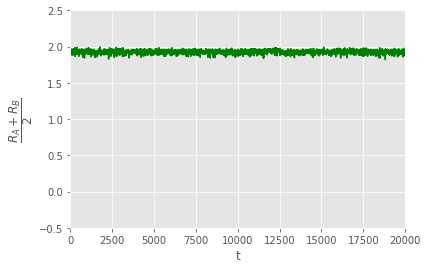

In [10]:
social_utility = 0.5*(np.asarray(r0ss).mean(axis=0) + np.asarray(r1ss).mean(axis=0))

plt.axis([0, max_steps*n_iter, -0.5, 2.5])
plt.plot(moving_average(social_utility, max_steps), 'g')
plt.xlabel('t');
plt.ylabel('$ \dfrac{R_A + R_B}{2} $');

In [7]:
dm.Q

array([[[48.73114288, 46.73070834],
        [47.73073428, 46.39403525]]])

In [8]:
adversary.Q

array([[[48.75764715, 46.76033506],
        [47.76388048, 46.40207675]]])